***2. Load The Dataset***

In [9]:
import pandas as pd 
import numpy as np

In [10]:
d = pd.read_csv('Churn_Modelling.csv')

In [11]:
d.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***3. Visuvalizations***

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

***Univariate Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


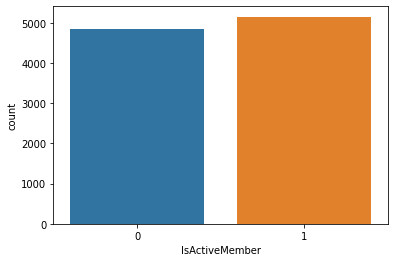

In [12]:
sns.countplot(d['IsActiveMember'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


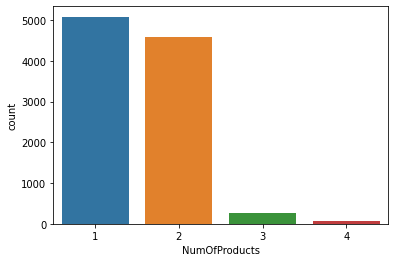

In [13]:
sns.countplot(d['NumOfProducts'])
plt.show()

***Bi - Variate Analysis***

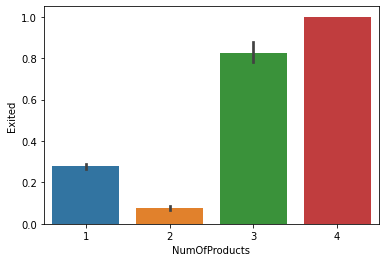

In [14]:
sns.barplot(x='NumOfProducts',y='Exited',data=d)

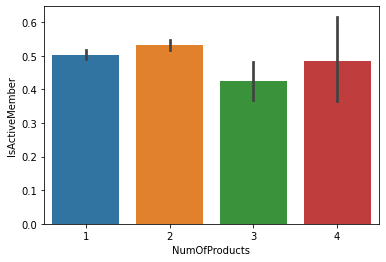

In [15]:
sns.barplot(x='NumOfProducts',y='IsActiveMember',data=d)

***Multi - Variate Analysis***

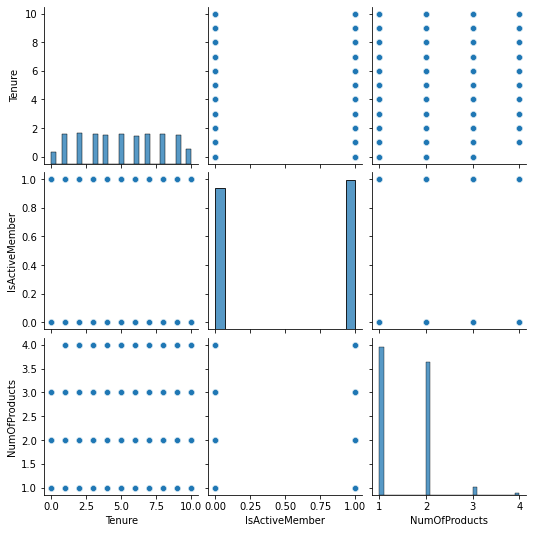

In [17]:
sns.pairplot(data=d[['Gender','Tenure','IsActiveMember','NumOfProducts']])

***4. Perform descriptive statistics on the dataset***

In [18]:
d.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


***5. Handle the Missing values***

In [19]:
d.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***6. Find the outliers and replace the outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


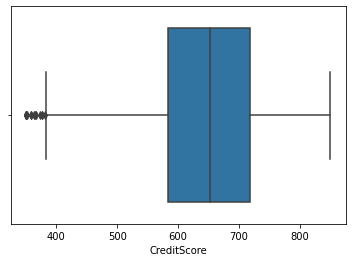

In [34]:
sns.boxplot(d['CreditScore'],data=d)

In [35]:
Q1=d['CreditScore'].quantile(0.25)
Q3=d['CreditScore'].quantile(0.75)
IQR=Q3-Q1
IQR

134.0

In [36]:
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
d['CreditScore']=np.where(d['CreditScore']>upper_whisker,upper_whisker,np.where(d['CreditScore']<lower_whisker,lower_whisker,d['CreditScore']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


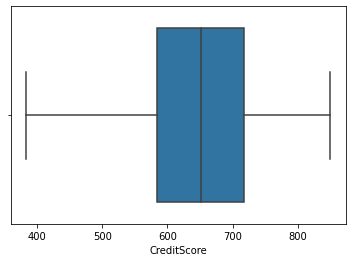

In [37]:
sns.boxplot(d['CreditScore'],data=d)

***7. Check for Categorical columns and perform encoding***

In [38]:
d.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder
d['Gender'] = LabelEncoder().fit_transform(d['Gender'])
d['Geography'] = LabelEncoder().fit_transform(d['Geography'])

***8. Split the data into dependent and independent variables***

In [46]:
x=d[['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y=d[['Exited']]

***9. Scale the independent variables***

In [47]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit_transform(x)

array([[-0.78321342, -0.32687761, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44080365,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53863634, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60524449, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25772996,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.4648682 , -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

***10. Split the data into training and testing***

In [48]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [49]:
x_train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8925,15805463,682.0,1,1,32,2,105163.88,2.0,1,1,164170.46
809,15778463,657.0,0,0,37,6,95845.60,1.0,1,0,122218.23
5903,15677317,570.0,0,0,29,4,153040.03,1.0,1,1,131363.57
9107,15617434,655.0,2,1,38,9,0.00,1.0,0,1,90490.33
4941,15715047,640.0,2,1,43,9,172478.15,1.0,1,0,191084.40


In [50]:
x_test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
293,15590241,750.0,2,0,34,9,112822.26,1.0,0,0,150401.53
1244,15616709,587.0,1,0,38,0,132122.42,2.0,0,0,31730.32
7353,15736420,596.0,0,1,21,4,210433.08,2.0,0,1,197297.77
5145,15680597,784.0,1,1,38,1,138515.02,1.0,1,1,171768.76
1618,15662955,697.0,0,1,27,8,141223.68,2.0,1,0,90591.15


In [51]:
y_train.head()

,Exited
8925,0
809,0
5903,1
9107,0
4941,1


In [52]:
y_test.head()

,Exited
293,1
1244,0
7353,1
5145,0
1618,0
